In [16]:
import cv2
import matplotlib.pyplot as plt
import numpy as np
from sklearn.cluster import KMeans

In [17]:
image_path = "../output_videos/player_image.jpg"  # Path to the image file
image = cv2.imread(image_path)
image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)  # Convert BGR to RGB for display

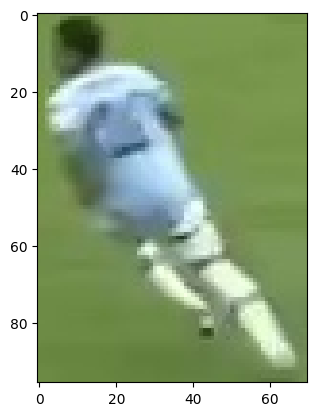

In [18]:
plt.imshow(image)
plt.show()

## Take the top half of the image 

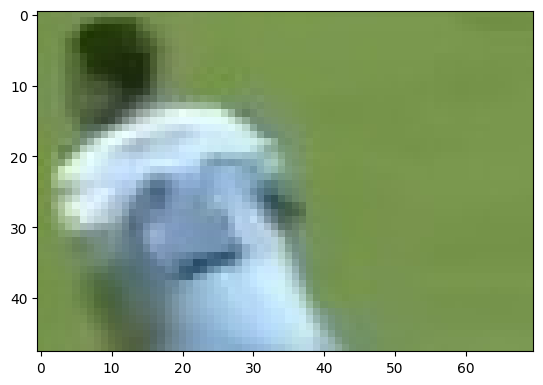

In [19]:
top_half = image[0: int(image.shape[0]/2), :]
plt.imshow(top_half)

## Cluster the image into two clusters

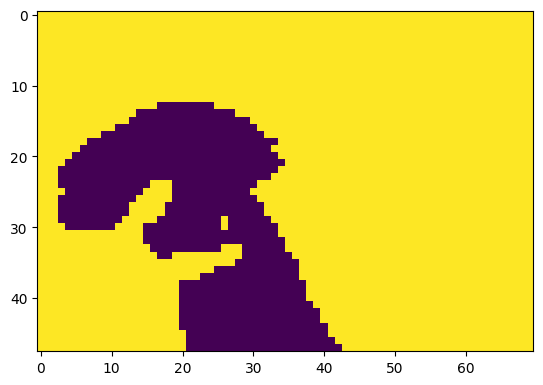

In [20]:
# reshape the image into a 2d array 
image_2d= top_half.reshape((-1, 3))

#perform k-means clustering
kmeans = KMeans(n_clusters=2, random_state=0)
kmeans.fit(image_2d)

# get the cluster lebals
labels = kmeans.labels_

#reshape the labels to the original image shape
clustered_image = labels.reshape(top_half.shape[0], top_half.shape[1])

#display the clustered image
plt.imshow(clustered_image)
plt.show()

In [21]:
corner_clusters = [clustered_image[0, 0], clustered_image[0, -1], clustered_image[-1, 0], clustered_image[-1, -1]] # Assuming cluster 0 is the corner color
non_player_clusters = max(set(corner_clusters), key=corner_clusters.count)
print(f"Non-player cluster: {non_player_clusters}")

Non-player cluster: 1


In [22]:
player_cluster = 1 - non_player_clusters
print(f"Player cluster: {player_cluster}")

Player cluster: 0


In [23]:
kmeans.cluster_centers_[player_cluster]  # This will give you the RGB values of the player cluster

array([169.33194444, 199.73611111, 216.13333333])